In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.metrics import pairwise_distances

## read metadat about all samples

In [48]:
# Select desease category (10 most abundant)
desC = pd.read_excel('results/RAD_counts.xlsx')
desC['ICD10_category'].head(10)

0    J35
1    I10
2    J20
3    K21
4    J30
5    B37
6    E78
7    J02
8    F32
9    I11
Name: ICD10_category, dtype: object

In [51]:
# read meta data
df = pd.read_excel('results/EstMB_phenotype_data.xlsx', index_col=False)
#df = df[['skood','J35','I10','J20','K21','J30','B37','E78','J02','F32','I11']]
df = df[['skood','J35']]

# skoov to vkood
sv = pd.read_excel('input/MB_scode_vcode.xlsx')
# map vkood to skood column df based on sv
df = df.merge(sv, left_on='skood', right_on='skood', how='left')
# drop skood column
df = df.drop(['skood'], axis=1)
#df_des = df[['vkood','J35', 'I10', 'J20', 'K21', 'J30', 'B37', 'E78', 'J02', 'F32', 'I11']]
df_des = df[['vkood','J35']]
df_des

,vkood,J35
0,VT2F0R,0
1,V6QVQM,1
2,VB6RZH,0
3,VE954R,0
4,VY9T1U,0
...,...,...
2505,VRFYJU,0
2506,VYIC70,0
2507,V76R3R,0
2508,V63O1J,0


In [21]:
all_bins = pd.read_excel('../2023_FINAL_build/results/together_all_MAGs_all_info.xlsx')
# add split bin_name column
all_bins['sample'] = all_bins['bin_name'].str.split('_').str[0]
tbl = all_bins[all_bins['bin_number_in_cluster'] > 18]
tbl = tbl[['sp', 'sample']]
tbl = tbl.drop_duplicates()
tbl.dropna(inplace=True)
tbl = tbl[tbl['sp'] != 'undefined']
# rename sample column
tbl = tbl.rename(columns={'sample': 'vkood'})

len(tbl)
# Assume df is your DataFrame and it has two columns 'Sample' and 'Bacteria'
bins_pivot = pd.get_dummies(tbl, columns=['sp']).groupby(['vkood'], as_index=False).max()
bins_pivot

,vkood,sp_43-108 sp001915545,sp_51-20 sp001917175,sp_Acetatifactor intestinalis,sp_Acetatifactor sp003447295,sp_Acetatifactor sp900066565,sp_Acetatifactor sp900755865,sp_Agathobacter faecis,sp_Agathobacter rectalis,sp_Agathobacter sp000434275,...,sp_Vescimonas sp900551995,sp_Victivallis lenta,sp_Victivallis sp900550905,sp_Victivallis sp900551245,sp_Victivallis sp900768515,sp_Victivallis vadensis,sp_Woodwardibium sp900760275,sp_Wujia chipingensis,sp_Zag111 sp002102825,sp_Zag111 sp002103105
0,V00H9L,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,V010T4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,V03HFT,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,V03ZU2,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,V0404P,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,VZWEWM,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1873,VZXIHP,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1874,VZY957,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1875,VZYSJ2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Melt df1 to convert it to long format
df1_melted = pd.melt(df_des, id_vars=['vkood'], var_name='disease', value_name='disease_status')
# Melt df2 to convert it to long format
df2_melted = pd.melt(bins_pivot, id_vars=['vkood'], var_name='bacterial_strain', value_name='presence')

# Merge df1_melted and df2_melted on 'vkood'
merged_df = pd.merge(df1_melted, df2_melted, on='vkood', how='inner')

# Create a contingency table considering both presence/absence and disease status
contingency_table = pd.crosstab(index=[merged_df['disease'], merged_df['disease_status']], columns=merged_df['bacterial_strain'])
contingency_table.T


disease                         J35     
disease_status                    0    1
bacterial_strain                        
sp_43-108 sp001915545          1419  458
sp_51-20 sp001917175           1419  458
sp_Acetatifactor intestinalis  1419  458
sp_Acetatifactor sp003447295   1419  458
sp_Acetatifactor sp900066565   1419  458
...                             ...  ...
sp_Victivallis vadensis        1419  458
sp_Woodwardibium sp900760275   1419  458
sp_Wujia chipingensis          1419  458
sp_Zag111 sp002102825          1419  458
sp_Zag111 sp002103105          1419  458

[711 rows x 2 columns]

In [59]:
bins_pivot

,vkood,sp_43-108 sp001915545,sp_51-20 sp001917175,sp_Acetatifactor intestinalis,sp_Acetatifactor sp003447295,sp_Acetatifactor sp900066565,sp_Acetatifactor sp900755865,sp_Agathobacter faecis,sp_Agathobacter rectalis,sp_Agathobacter sp000434275,...,sp_Vescimonas sp900551995,sp_Victivallis lenta,sp_Victivallis sp900550905,sp_Victivallis sp900551245,sp_Victivallis sp900768515,sp_Victivallis vadensis,sp_Woodwardibium sp900760275,sp_Wujia chipingensis,sp_Zag111 sp002102825,sp_Zag111 sp002103105
0,V00H9L,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,V010T4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,V03HFT,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,V03ZU2,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,V0404P,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,VZWEWM,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1873,VZXIHP,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1874,VZY957,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1875,VZYSJ2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Melt df1 to convert it to long format
df1_melted = pd.melt(df_des, id_vars=['vkood'], var_name='disease', value_name='disease_status')

# Melt df2 to convert it to long format
df2_melted = pd.melt(bins_pivot, id_vars=['vkood'], var_name='bacterial_strain', value_name='presence')

# Merge df1_melted and df2_melted on 'vkood'
merged_df = pd.merge(df1_melted, df2_melted, on='vkood', how='inner')

# Create a contingency table considering both presence/absence and disease status
contingency_table = pd.crosstab(index=[merged_df['disease'], merged_df['disease_status']], columns=merged_df['bacterial_strain'])
contingency_table.T

disease                         J35     
disease_status                    0    1
bacterial_strain                        
sp_43-108 sp001915545          1419  458
sp_51-20 sp001917175           1419  458
sp_Acetatifactor intestinalis  1419  458
sp_Acetatifactor sp003447295   1419  458
sp_Acetatifactor sp900066565   1419  458
...                             ...  ...
sp_Victivallis vadensis        1419  458
sp_Woodwardibium sp900760275   1419  458
sp_Wujia chipingensis          1419  458
sp_Zag111 sp002102825          1419  458
sp_Zag111 sp002103105          1419  458

[711 rows x 2 columns]

In [5]:
# read info about disease codes

nm = pd.read_excel('input/ICD10_name_data_v3.xlsx')
# Print the names of all columns
column_names = df.columns
# convrt nm to df
column_names = pd.DataFrame(column_names)
# change column name
column_names.columns = ['ICD10_category']
# merge nm and column names
mrg = pd.merge(nm, column_names, on='ICD10_category', how='inner')

mrg.to_excel('results/ICD10_name_data_v3.xlsx', index=False)

In [24]:
# Calculate number of cases for each ICD code
st = []

# Iterate through each disease code in mrg
for code in mrg['ICD10_category']:
    yes_count = df[code].eq(1).sum()  # Count 'cases' (where value is 1)
    no_count = df[code].eq(0).sum()   # Count 'controls' (where value is 0)
    
    st.append({'ICD10_category': code, 'cases': yes_count, 'controls': no_count})

# Convert the list of dictionaries into a DataFrame
st = pd.DataFrame(st)

# Merge the count information with the mrg DataFrame
st = st.merge(mrg, on='ICD10_category').sort_values('cases', ascending=False)

st.to_excel('results/RAD_counts.xlsx', index=False)
st

,ICD10_category,cases,controls,ICD10_name
36,J35,614,1895,Chronic diseases of tonsils and adenoids
24,I10,609,1900,Essential (primary) hypertension
33,J20,568,1941,Acute bronchitis
38,K21,558,1951,Gastro-esophageal reflux disease
34,J30,549,1960,Vasomotor and allergic rhinitis
...,...,...,...,...
42,K50,14,2495,Crohn's disease [regional enteritis]
19,G20,14,2495,Parkinson's disease
14,F31,13,2496,Bipolar disorder
3,D10,10,2499,Benign neoplasm of mouth and pharynx


## Form potential case-controls group by disease

In [26]:
# Asthma
icd = 'J45'

### Form groups based on main characters only

In [92]:
case = df[df[icd] == 1]
case = case[['skood', 'gender', 'Age_at_MBsample', 'BMI', 'antibiotics']]
case = case.dropna()

case.to_excel('results/'+str(icd)+'_case.xlsx')

case.head(2)

,skood,gender,Age_at_MBsample,BMI,antibiotics
11,EGVD008055,1,42.0,29.87,Not in the last year
34,EGVD038423,1,69.0,30.90,Not in the last year


In [82]:
cntr1 = df[df[icd] != 1]
cntr1 = cntr1[['skood', 'gender', 'Age_at_MBsample', 'BMI', 'antibiotics']]
cntr1 = cntr1.dropna()
cntr1.head(2)

,skood,gender,Age_at_MBsample,BMI,antibiotics
0,EGVD049674,1,35.0,20.24,Not in the last year
1,EGVD046120,1,36.0,18.89,In the last 6 months


In [95]:
# all vs all
selected_rows = []

for index, row_df1 in case.iterrows():
    # Filter df2 to rows with different names
    filtered_df2 = cntr1[cntr1['skood'] != row_df1['skood']]
    
    # Calculate pairwise distances using age, bmi, and weight
    distances = pairwise_distances(
        filtered_df2[['gender', 'Age_at_MBsample', 'BMI']],
        [row_df1[['gender', 'Age_at_MBsample', 'BMI']]],
        metric='euclidean'
    )
    
    # Get the index of the row with the minimum distance
    min_distance_idx = distances.argmin()
    
    # Add the selected row to the list
    selected_rows.append(filtered_df2.iloc[min_distance_idx])

# Create a new DataFrame from the selected rows
cntr = pd.DataFrame(selected_rows)
#cntr

In [96]:
selected_rows = []

for index, row_df1 in case.iterrows():
    # Filter df2 to rows with different names
    filtered_df2 = cntr1[cntr1['skood'] != row_df1['skood']]
    
    # Calculate pairwise distances using age, bmi, and weight
    distances = pairwise_distances(
        filtered_df2[['gender', 'Age_at_MBsample', 'BMI']],
        [row_df1[['gender', 'Age_at_MBsample', 'BMI']]],
        metric='euclidean'
    )
    
    # Get the index of the row with the minimum distance
    min_distance_idx = distances.argmin()
    
    # Add the selected row to the list
    selected_rows.append(filtered_df2.iloc[min_distance_idx])

    # Update df2 by dropping the selected row
    cntr1 = cntr1.drop(filtered_df2.index[min_distance_idx])

# Create a new DataFrame from the selected rows
cntr_it = pd.DataFrame(selected_rows)

cntr_it.to_excel('results/'+str(icd)+'_cntr.xlsx')

## Check final groups similarity

(array([ 56.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 183.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

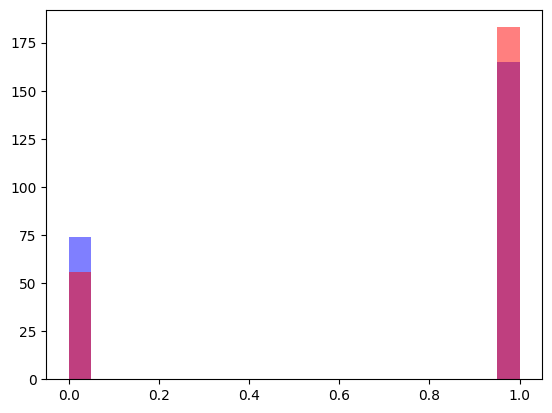

In [97]:
plt.hist(cntr_it['gender'], bins=20, alpha=0.5, label='cntr', color='blue')
plt.hist(case['gender'], bins=20, alpha=0.5, label='case', color='red')